<center><h1>Testing for Normality</h1></center>

In [1]:
%matplotlib inline
import pyodbc
import pandas as pd
import xlwings as xw
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [12]:
wb = xw.Workbook.active()
data = xw.Range('A1').table.value
df = pd.DataFrame(data=data[1:], columns=data[0])
df.sort_values(by=['VIN','DAYS_TO_FAIL_MINZERO'], inplace=True)
df.head()

,VIN,FAIL_SHORT_PARTNO,FAIL_SHORT_PARTNAME,FAIL_PARTNO,FAIL_PART_DESC,PART_COST_USD,CLAIM_COST_USD,CUST_CONTENTION_TEXT_ENRICHED,CUSTOMER_CONTENTION_TEXT,RO_COMPLAINT_DESC,...,FOUR_WHEEL_DRIVE,NAVIGATION,AF_OFF_YR_MTH,RO_YR_MTH,PRI_LAB_OPRTN_CD,CLM_SK,VIN_SK,CLM_NO,CLAIM_DLR_NO,DEFECT_CODE
0,19UUB1F30FA000510,31500,BAT,31500-TZ4-100M,BAT (GR35/470CCA),69.25,128.45,CUSTOMER STATE VEHICLE HAVE TO BE JUMP START C...,CUSTOMER STATES VEHICLE HAD TO BE JUMP STARTED...,CUSTOMER STATES VEHICLE HAD TO BE JUMP STARTED...,...,N,N,2014-08,2015-01,710100,78528739,38371672,191581,251551,56000
1,19UUB1F30FA001107,31500,BAT,31500-TZ4-100M,BAT (GR35/470CCA),69.25,151.46,CUSTOMER STATE CAR BAD START FIND BAD BATTERY ...,CUSTOMER STATES CAR HARD TO START. FOUND BATTE...,CUSTOMER STATES BATTERY DEAD. REPLACE BATTERY ...,...,N,N,2014-08,2015-08,710100,82920571,38410120,821114,251069,56200
2,19UUB1F30FA002385,31500,BAT,31500-TZ4-100M,BAT (GR35/470CCA),69.25,123.95,BATTERY INOP UNIT BE BAD START,BATTERY NOT WORKING UNIT IS NOT STARTING,MISSING ...,...,N,N,2014-08,2015-07,710100,82025367,38471937,082721,295526,56000
3,19UUB1F30FA002497,31500,BAT,31500-TZ4-100M,BAT (GR35/470CCA),69.08,158.4,CUSTOMER STATE VEHICLE BAD START PLEASE BAD BA...,"CUSTOMER STATES VEHICLE HARD TO START, PLEASE ...","CUSTOMER STATES VEHICLE HARD TO START, PLEASE ...",...,N,N,2014-08,2016-02,710100,87944166,38480389,321777,251095,56000
4,19UUB1F30FA002662,31500,BAT,31500-TZ4-100M,BAT (GR35/470CCA),69.25,185.69,SEVERAL WARNING LIGHT COME ON CAR BE TOW IN TE...,SEVERAL WARNING LIGHTS CAME ON. CAR WAS TOWED ...,UNKNOWN ...,...,N,N,2014-08,2015-09,710100,84083814,38488891,452191,251507,56000


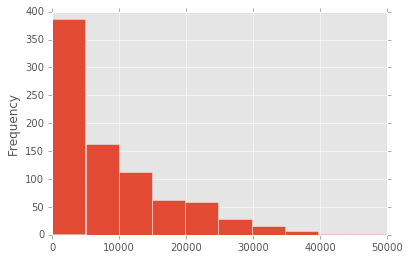

In [7]:
df.MILES_TO_FAIL.plot.hist()
plt.show()

In [9]:
df.Array1.describe()

count    640.000000
mean     451.431250
std       14.968981
min      405.000000
25%      441.000000
50%      452.000000
75%      461.000000
max      495.000000
Name: Array1, dtype: float64

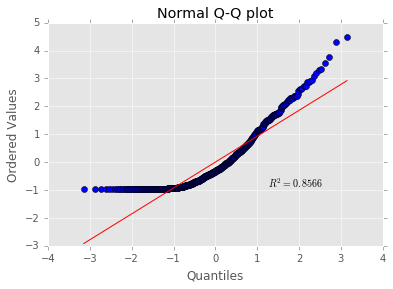

In [8]:
z = (df.MILES_TO_FAIL-df.MILES_TO_FAIL.mean())/df.MILES_TO_FAIL.std()
stats.probplot(z, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [39]:
help(stats.normaltest)

Help on function normaltest in module scipy.stats.stats:

normaltest(a, axis=0)
    Tests whether a sample differs from a normal distribution.
    
    This function tests the null hypothesis that a sample comes
    from a normal distribution.  It is based on D'Agostino and
    Pearson's [1]_, [2]_ test that combines skew and kurtosis to
    produce an omnibus test of normality.
    
    
    Parameters
    ----------
    a : array_like
        The array containing the data to be tested.
    axis : int or None, optional
        Axis along which to compute test. Default is 0. If None,
        compute over the whole array `a`.
    
    Returns
    -------
    statistic : float or array
        `s^2 + k^2`, where `s` is the z-score returned by `skewtest` and
        `k` is the z-score returned by `kurtosistest`.
    pvalue : float or array
       A 2-sided chi squared probability for the hypothesis test.
    
    References
    ----------
    .. [1] D'Agostino, R. B. (1971), "An omnibus t

In [22]:
statistic, pvalue = stats.normaltest(df.Array1)
if pvalue > 0.05:
    print("Data most likely is normally distributed")
else:
    print("Data is not likely to be normally distributed")

Data most likely is normally distributed


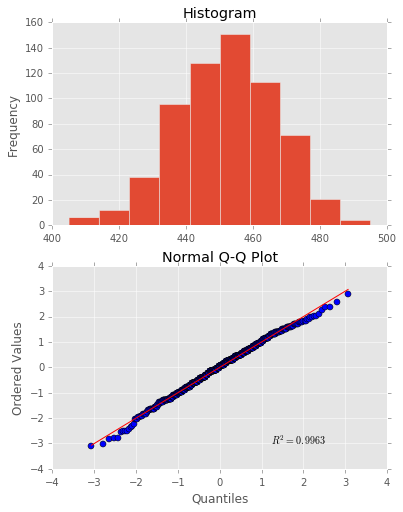

In [36]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6,8))

ax1 = plt.subplot(211)
df.Array1.plot.hist()
ax1.set_title("Histogram")

ax2 = plt.subplot(212)
z = (df.Array1-df.Array1.mean())/df.Array1.std()
stats.probplot(z, dist="norm", plot=plt,)
ax2.set_title("Normal Q-Q Plot")

plt.show()